In [3]:
!pip install darts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from darts import TimeSeries

In [2]:
from darts import TimeSeries

In [3]:
# Read a pandas DataFrame
df = pd.read_csv('../data/01_raw/Electric_Production.csv')
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [4]:
# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df, time_col='DATE', value_cols='Value')
series.head()

<TimeSeries (DataArray) (DATE: 5, component: 1, sample: 1)>
array([[[72.5052]],

       [[70.672 ]],

       [[62.4502]],

       [[57.4714]],

       [[55.3151]]])
Coordinates:
  * DATE       (DATE) datetime64[ns] 1985-01-01 1985-02-01 ... 1985-05-01
  * component  (component) object 'Value'
Dimensions without coordinates: sample

In [5]:
type(series)

darts.timeseries.TimeSeries

In [6]:
len(series)

397

In [7]:
series

<TimeSeries (DataArray) (DATE: 397, component: 1, sample: 1)>
array([[[ 72.5052]],

       [[ 70.672 ]],

       [[ 62.4502]],

       [[ 57.4714]],

       [[ 55.3151]],

       [[ 58.0904]],

       [[ 62.6202]],

       [[ 63.2485]],

       [[ 60.5846]],

       [[ 56.3154]],

...

       [[ 88.353 ]],

       [[ 92.0805]],

       [[102.1532]],

       [[112.1538]],

       [[108.9312]],

       [[ 98.6154]],

       [[ 93.6137]],

       [[ 97.3359]],

       [[114.7212]],

       [[129.4048]]])
Coordinates:
  * DATE       (DATE) datetime64[ns] 1985-01-01 1985-02-01 ... 2018-01-01
  * component  (component) object 'Value'
Dimensions without coordinates: sample

In [108]:
data = series.pd_dataframe()
data

component,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [128]:
data.columns

Index(['Value'], dtype='object', name='component')

In [110]:
series2 = TimeSeries.from_dataframe(data)
series2

<TimeSeries (DataArray) (DATE: 397, component: 1, sample: 1)>
array([[[ 72.5052]],

       [[ 70.672 ]],

       [[ 62.4502]],

       [[ 57.4714]],

       [[ 55.3151]],

       [[ 58.0904]],

       [[ 62.6202]],

       [[ 63.2485]],

       [[ 60.5846]],

       [[ 56.3154]],

...

       [[ 88.353 ]],

       [[ 92.0805]],

       [[102.1532]],

       [[112.1538]],

       [[108.9312]],

       [[ 98.6154]],

       [[ 93.6137]],

       [[ 97.3359]],

       [[114.7212]],

       [[129.4048]]])
Coordinates:
  * DATE       (DATE) datetime64[ns] 1985-01-01 1985-02-01 ... 2018-01-01
  * component  (component) object 'Value'
Dimensions without coordinates: sample

In [40]:
# Another option, load a TimeSeries directly from a csv
series_csv = TimeSeries.from_csv('../data/01_raw/Electric_Production.csv',
                             time_col='DATE',
                             value_cols='Value')
series_csv.head()

<TimeSeries (DataArray) (DATE: 5, component: 1, sample: 1)>
array([[[72.5052]],

       [[70.672 ]],

       [[62.4502]],

       [[57.4714]],

       [[55.3151]]])
Coordinates:
  * DATE       (DATE) datetime64[ns] 1985-01-01 1985-02-01 ... 1985-05-01
  * component  (component) object 'Value'
Dimensions without coordinates: sample

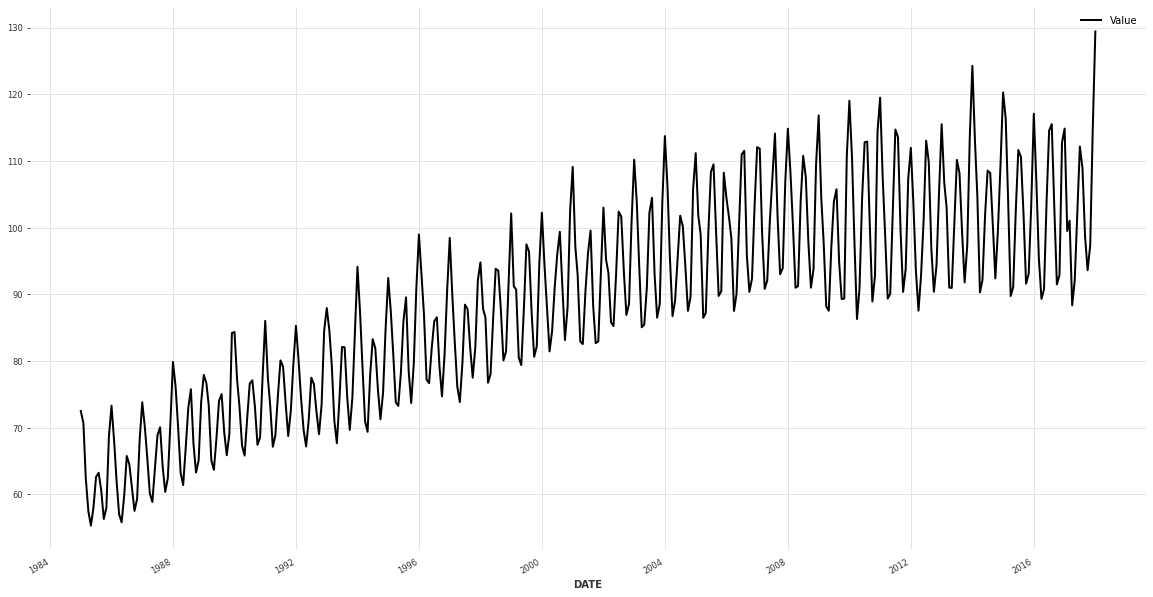

In [41]:
fig, ax = plt.subplots(figsize = (20, 10))
series.plot()

# Train - test split

In [42]:
series.n_timesteps

397

In [43]:
df.shape[0]

397

In [44]:
test_size = 0.2
# df.shape[0] = len(df) = series.n_timesteps = len(series)
test_set = int(df.shape[0]*test_size)
train = series[:-test_set]
test = series[-test_set:]
display(train.head(), test.head())

<TimeSeries (DataArray) (DATE: 5, component: 1, sample: 1)>
array([[[72.5052]],

       [[70.672 ]],

       [[62.4502]],

       [[57.4714]],

       [[55.3151]]])
Coordinates:
  * DATE       (DATE) datetime64[ns] 1985-01-01 1985-02-01 ... 1985-05-01
  * component  (component) object 'Value'
Dimensions without coordinates: sample

<TimeSeries (DataArray) (DATE: 5, component: 1, sample: 1)>
array([[[114.7068]],

       [[113.5958]],

       [[ 99.4712]],

       [[ 90.3566]],

       [[ 93.8095]]])
Coordinates:
  * DATE       (DATE) datetime64[ns] 2011-07-01 2011-08-01 ... 2011-11-01
  * component  (component) object 'Value'
Dimensions without coordinates: sample

# Forecasting

In [45]:
# Número de periodos o time steps a predecir = horizonte
periods = 36

## Naive

In [114]:
from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=1)
naive_model.fit(train)

# usamos len(test) en vez de sólo 36 períodos
naive_forecast = naive_model.predict(len(test))

In [119]:
naive_forecast.pd_dataframe()

component,Value
DATE,
2011-07-01,102.8204
2011-08-01,102.8204
2011-09-01,102.8204
2011-10-01,102.8204
2011-11-01,102.8204
...,...
2017-09-01,102.8204
2017-10-01,102.8204
2017-11-01,102.8204


In [126]:
df = train.pd_dataframe()
TimeSeries.from_dataframe(df.iloc[:36])

<TimeSeries (DataArray) (DATE: 36, component: 1, sample: 1)>
array([[[72.5052]],

       [[70.672 ]],

       [[62.4502]],

       [[57.4714]],

       [[55.3151]],

       [[58.0904]],

       [[62.6202]],

       [[63.2485]],

       [[60.5846]],

       [[56.3154]],

...

       [[65.61  ]],

       [[60.1586]],

       [[58.8734]],

       [[63.8918]],

       [[68.8694]],

       [[70.0669]],

       [[64.1151]],

       [[60.3789]],

       [[62.4643]],

       [[70.5777]]])
Coordinates:
  * DATE       (DATE) datetime64[ns] 1985-01-01 1985-02-01 ... 1987-12-01
  * component  (component) object 'Value'
Dimensions without coordinates: sample

In [127]:
naive_model = NaiveSeasonal(K=1)
naive_model.fit(TimeSeries.from_dataframe(df))

type(naive_model)

darts.models.forecasting.baselines.NaiveSeasonal

In [124]:
naive_forecast = naive_model.predict(len(test))
naive_forecast

<TimeSeries (DataArray) (DATE: 79, component: 1, sample: 1)>
array([[[102.8204]],

       [[102.8204]],

       [[102.8204]],

       [[102.8204]],

       [[102.8204]],

       [[102.8204]],

       [[102.8204]],

       [[102.8204]],

       [[102.8204]],

       [[102.8204]],

...

       [[102.8204]],

       [[102.8204]],

       [[102.8204]],

       [[102.8204]],

       [[102.8204]],

       [[102.8204]],

       [[102.8204]],

       [[102.8204]],

       [[102.8204]],

       [[102.8204]]])
Coordinates:
  * DATE       (DATE) datetime64[ns] 2011-07-01 2011-08-01 ... 2018-01-01
  * component  (component) object 'Value'
Dimensions without coordinates: sample

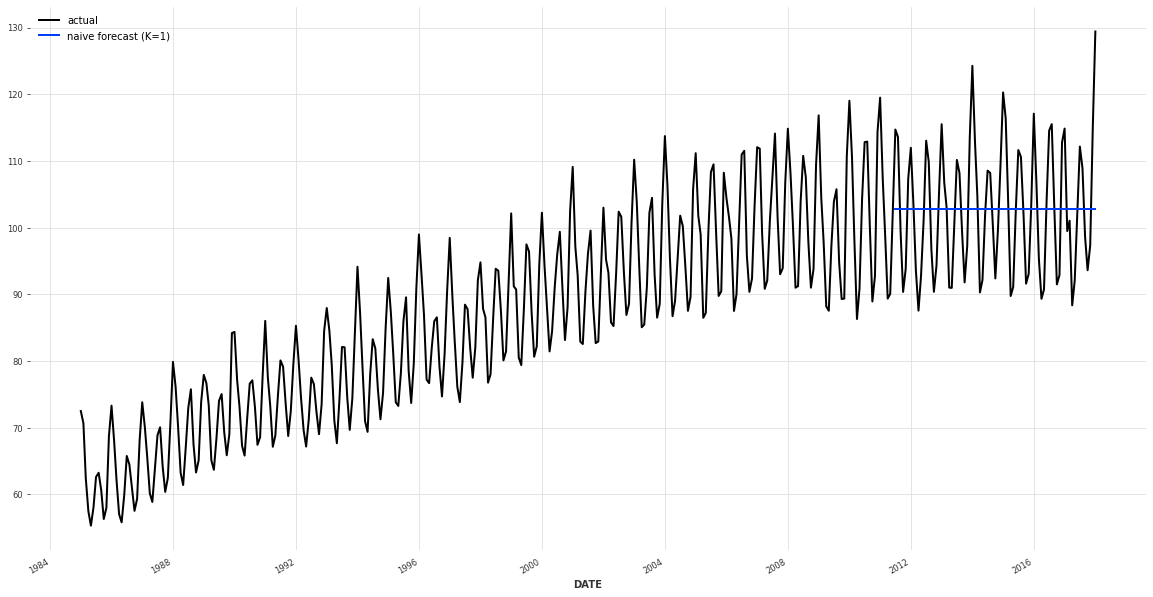

In [115]:
fig, ax = plt.subplots(figsize = (20, 10))

series.plot(label="actual")
naive_forecast.plot(label="naive forecast (K=1)")

# NaiveDrift

In [54]:
from darts.models import NaiveDrift

drift_model = NaiveDrift()
drift_model.fit(train)
drift_forecast = drift_model.predict(len(test))

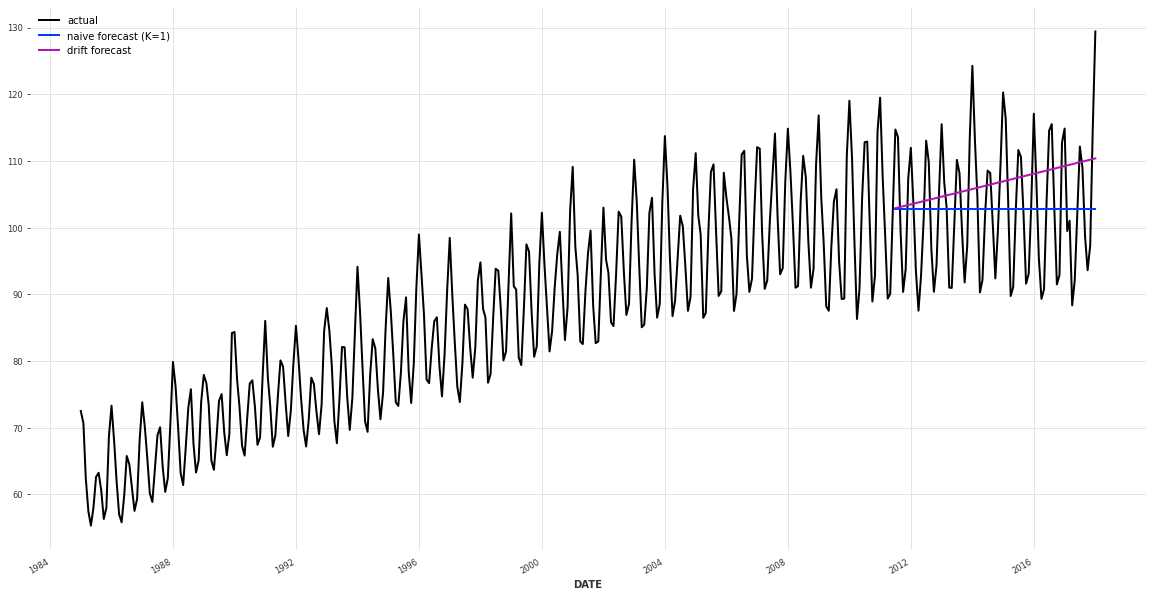

In [56]:
fig, ax = plt.subplots(figsize = (20, 10))

series.plot(label = 'actual')
naive_forecast.plot(label="naive forecast (K=1)")
drift_forecast.plot(label = 'drift forecast')

# Facebook Prophet

In [62]:
from darts.models import Prophet

prophet_model = Prophet()
prophet_model.fit(train)
prophet_forecast = prophet_model.predict(len(test))

2022-06-14 17:33:23,696 - prophet - INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
2022-06-14 17:33:23,697 - prophet - INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


/home/sgrodriguez/miniconda3/envs/kedro_timeseries/lib/python3.8/site-packages/pyximport/pyximport.py:51: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
/home/sgrodriguez/miniconda3/envs/kedro_timeseries/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/sgrodriguez/miniconda3/envs/kedro_timeseries/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/sgrodriguez/miniconda3/envs/kedro_timeseries/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

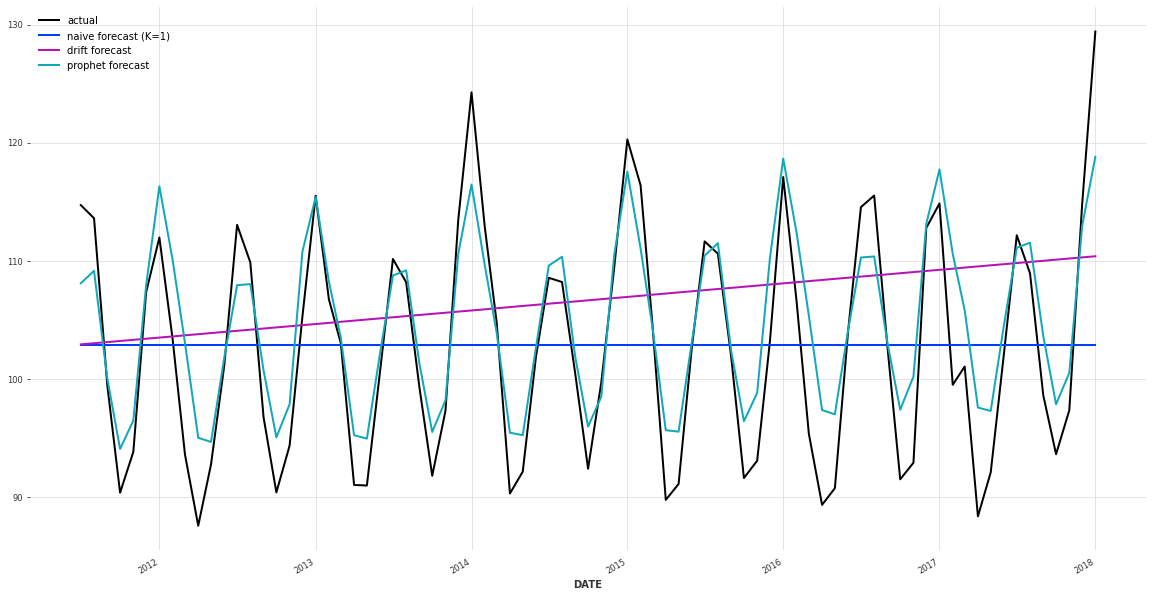

In [64]:
fig, ax = plt.subplots(figsize = (20, 10))

test.plot(label = 'actual')
naive_forecast.plot(label="naive forecast (K=1)")
drift_forecast.plot(label = 'drift forecast')
prophet_forecast.plot(label = 'prophet forecast')

In [68]:
prophet_model_2 = Prophet(changepoint_prior_scale = 0.5,
                         seasonality_mode = 'multiplicative',
                         seasonality_prior_scale = 0.1)
prophet_model_2.fit(train)
prophet_forecast_2 = prophet_model_2.predict(len(test))

2022-06-14 17:40:34,056 - prophet - INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
2022-06-14 17:40:34,057 - prophet - INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


/home/sgrodriguez/miniconda3/envs/kedro_timeseries/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/sgrodriguez/miniconda3/envs/kedro_timeseries/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/sgrodriguez/miniconda3/envs/kedro_timeseries/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


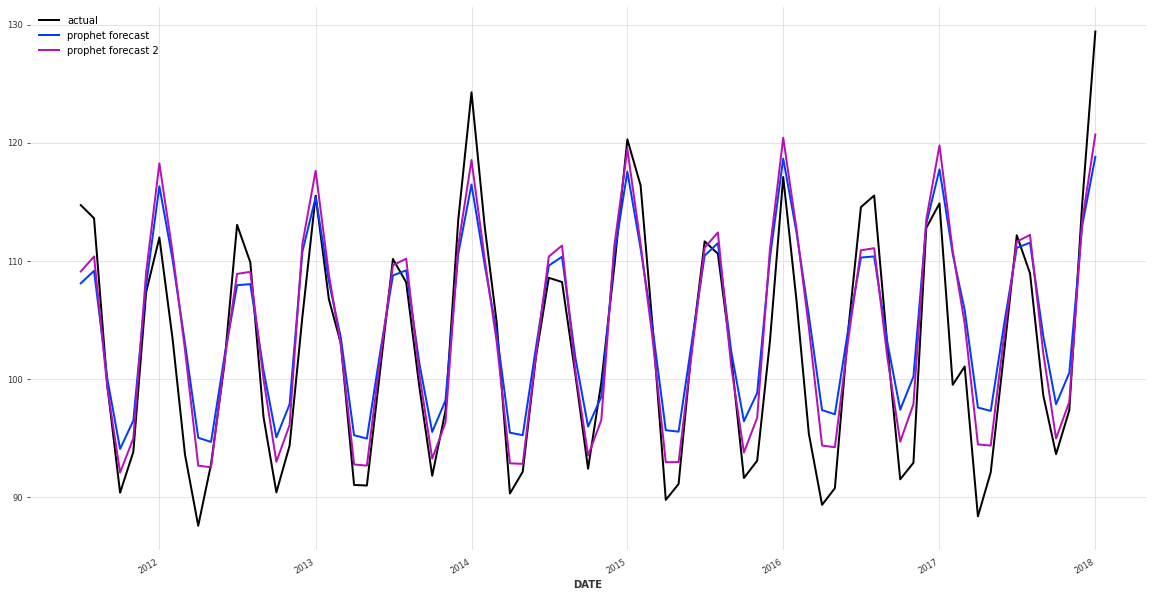

In [69]:
fig, ax = plt.subplots(figsize = (20, 10))

test.plot(label = 'actual')
prophet_forecast.plot(label = 'prophet forecast')
prophet_forecast_2.plot(label = 'prophet forecast 2')

In [71]:
prophet_model_3 = Prophet(changepoint_prior_scale = 0.05,
                         seasonality_mode = 'multiplicative',
                         seasonality_prior_scale = 10)
prophet_model_3.fit(train)
prophet_forecast_3 = prophet_model_3.predict(len(test))

2022-06-14 17:43:37,190 - prophet - INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
2022-06-14 17:43:37,191 - prophet - INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


/home/sgrodriguez/miniconda3/envs/kedro_timeseries/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/sgrodriguez/miniconda3/envs/kedro_timeseries/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/sgrodriguez/miniconda3/envs/kedro_timeseries/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


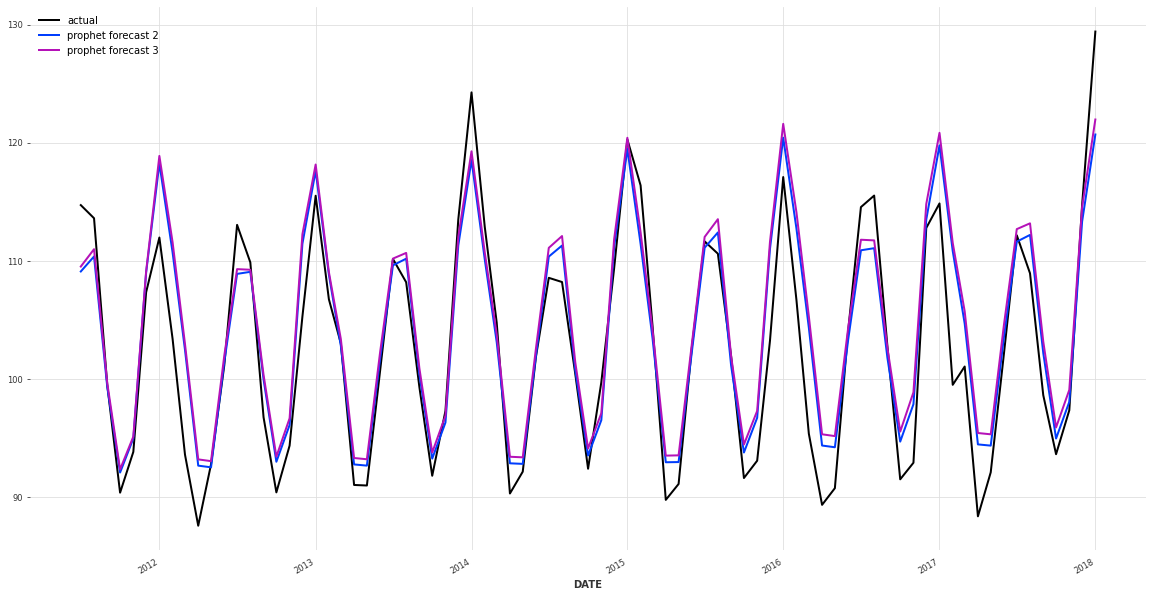

In [72]:
fig, ax = plt.subplots(figsize = (20, 10))

test.plot(label = 'actual')
prophet_forecast_2.plot(label = 'prophet forecast 2')
prophet_forecast_3.plot(label = 'prophet forecast 3')

# ARIMA

In [88]:
from darts.models import ARIMA

arima_model = ARIMA()
arima_model.fit(train)
arima_forecast = arima_model.predict(len(test))

/home/sgrodriguez/miniconda3/envs/kedro_timeseries/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/sgrodriguez/miniconda3/envs/kedro_timeseries/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


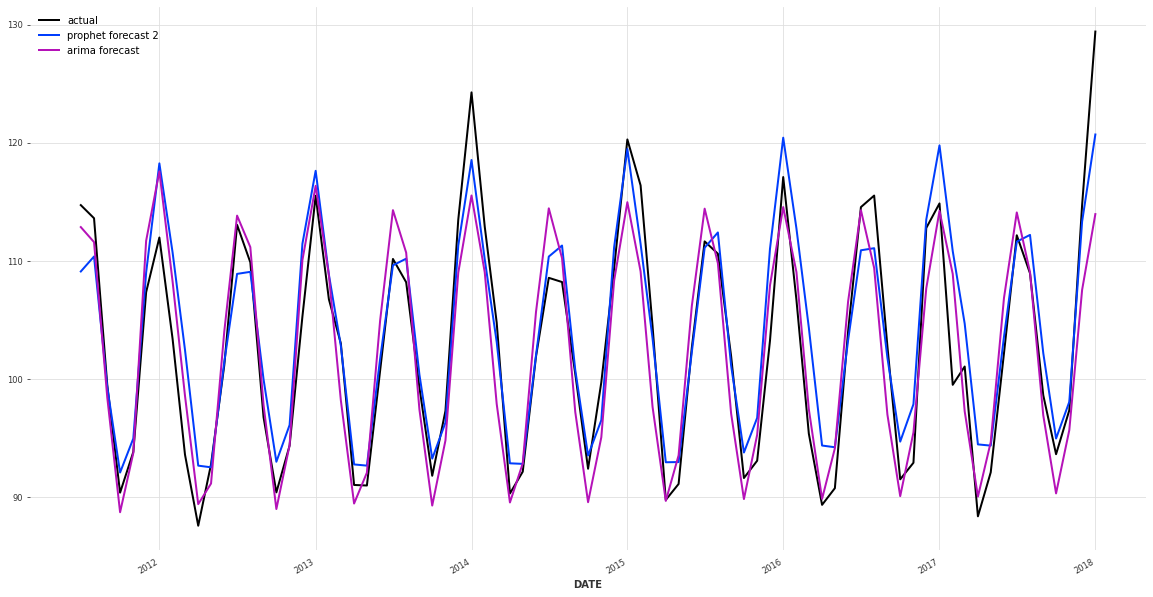

In [89]:
fig, ax = plt.subplots(figsize = (20, 10))

test.plot(label = 'actual')
prophet_forecast_2.plot(label = 'prophet forecast 2')
arima_forecast.plot(label = 'arima forecast')

# Exponential Smoothing

In [90]:
from darts.models import ExponentialSmoothing

expo_sm_model = ExponentialSmoothing()
expo_sm_model.fit(train)
expo_sm_forecast = expo_sm_model.predict(len(test))

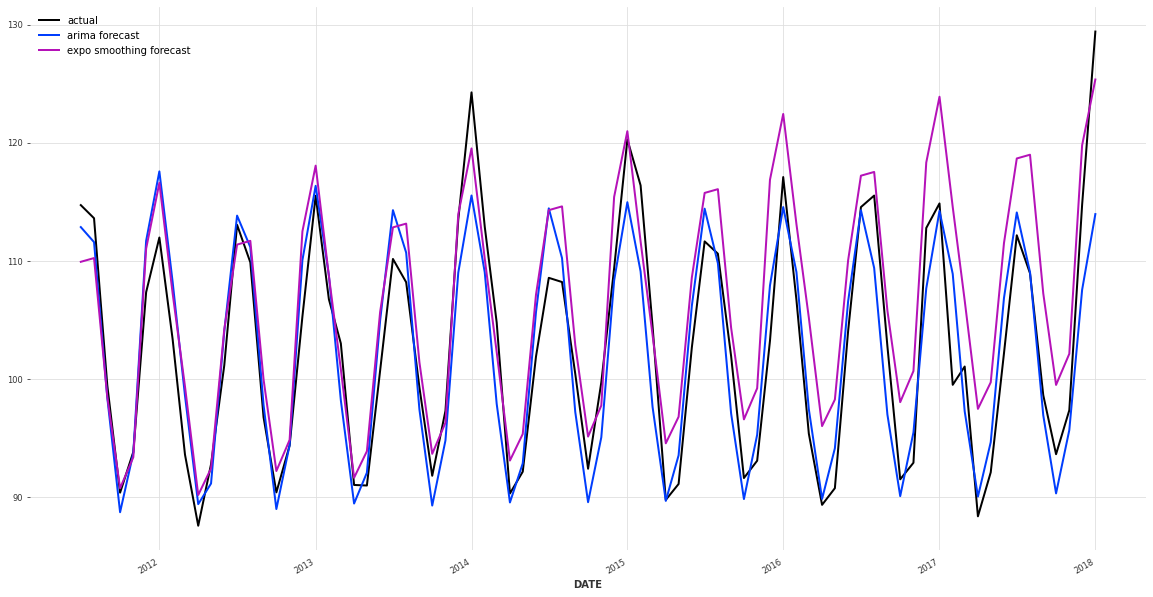

In [91]:
fig, ax = plt.subplots(figsize = (20, 10))

test.plot(label = 'actual')
arima_forecast.plot(label = 'arima forecast')
expo_sm_forecast.plot(label = 'expo smoothing forecast')

# Evaluación y comparación de modelos

In [30]:
from darts.metrics import mape, mase, mae, mse, ope, r2_score, rmse, rmsle

In [60]:
forecasts = {'naive_forecast': naive_forecast,
            'drift_forecast': drift_forecast,
            'prophet_forecast': prophet_forecast,
            'arima_forecast': arima_forecast,
            'expo_smoothing_forecast': expo_sm_forecast}

In [34]:
horizon = 36
w = 6 # window forecast

metric_windows = [f'{i}-{i+(w-1)}' for i in range(1, horizon+1, w)]

metric_rmse = []

for i in range(0, horizon, w):
    metric_rmse.append(rmse(test[i:i+w], naive_forecast[i:i+w]))

In [35]:
metric_windows

['1-6', '7-12', '13-18', '19-24', '25-30', '31-36']

In [129]:
# Naive forecast
metric_rmse = [rmse(test[i:i+w], naive_forecast[i:i+w]) for i in range(0, horizon, w)]
metric_rmse

[9.358622019738446,
 9.186637422002317,
 8.401330196363752,
 8.76310010983556,
 7.754064931698729,
 11.808263042180817]

In [61]:
# Naive drift forecast
metric_rmse = []

for i in range(0, horizon, w):
    metric_rmse.append(rmse(test[i:i+w], drift_forecast[i:i+w]))

metric_rmse

[9.441378125764691,
 9.734174147508755,
 8.824389644305315,
 9.452827055409424,
 8.038289581424413,
 11.950989674234338]

In [65]:
# Prophet forecast
metric_rmse = []

for i in range(0, horizon, w):
    metric_rmse.append(rmse(test[i:i+w], prophet_forecast[i:i+w]))

metric_rmse

[3.764587135860322,
 5.951577335922929,
 4.270126431707296,
 2.527060038098994,
 2.2324251017101977,
 4.2578016426608265]

In [70]:
# Prophet forecast 2
metric_rmse = []

for i in range(0, horizon, w):
    metric_rmse.append(rmse(test[i:i+w], prophet_forecast_2[i:i+w]))

metric_rmse

[2.859629081635869,
 5.741005634315631,
 3.5574501157337206,
 1.6181577752048402,
 1.4899961667429502,
 2.8905882273854826]

In [73]:
# Prophet forecast 3
metric_rmse = []

for i in range(0, horizon, w):
    metric_rmse.append(rmse(test[i:i+w], prophet_forecast_3[i:i+w]))

metric_rmse

[2.665547252215893,
 6.254249879896601,
 3.88171328838823,
 2.043020434274759,
 1.5750398139437358,
 2.6545703064372392]

In [93]:
# ARIMA forecast
metric_rmse = []

for i in range(0, horizon, w):
    metric_rmse.append(rmse(test[i:i+w], arima_forecast[i:i+w]))

metric_rmse

[2.2496702686434813,
 3.95750620472952,
 2.1652551400868125,
 2.8754689341586825,
 3.1528933673996806,
 5.064193798429474]

In [94]:
# Exponential smoothing forecast
metric_rmse = []

for i in range(0, horizon, w):
    metric_rmse.append(rmse(test[i:i+w], expo_sm_forecast[i:i+w]))

metric_rmse

[2.8677396301778586,
 3.7860752701715663,
 3.459058782176928,
 2.8467492682207514,
 2.6137936746163484,
 3.6855568562075227]

In [2]:
from darts.models import ARIMA

arima_model = ARIMA()

/home/sgrodriguez/miniconda3/envs/kedro_timeseries/lib/python3.8/site-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, '__version__') or LooseVersion(tensorboard.__version__) < LooseVersion('1.15'):
